# INFO6105 Data Science Engineering Methods & Tools 


## Final Project

### Team members: 
    Aishwarya Sawant (NUID: 001059228)

# Used Car Price Detection

Data source : https://www.kaggle.com/austinreese/craigslist-carstrucks-data 

## Table of Content:

### a. Data Preprocessing
    1.Reindexing Dataframes
    2.Removed irrelevant features
    3.Missing value imputation 
      3.1 Estimating better iterative imputer method
      3.2 Filling numerical missing values
      3.3 Filling categorical missing values
    4.Detecting Outliers
      4.1 Histogram
      4.2 Box-plot
      4.3 Box-plot of outliers
      4.4 Co-relation matrix
    5.Removing Outliers
      5.1 Z-Score
      5.2 IQR Score
      5.3 Box-plot and Histograms after eliminating outliers
    6.Data Normalization
      6.1 Transforming Categorical columns into integer values
      6.2 Scaling/Standardizing
### b. Data Visualization
    1.Distribution of price
    2.Fuel-Price bar graph
    3.Fuel-Price-Condition graph
    4.Type-Price graph and Manufacturer-Price graph
    5.Year-Number_of_cars graph and Manufacturer-Number_of_cars graph
### c. Split dataset
### d. Function to compute MSE, RMSE & R-Square
### e. Feature Engineering
    1.Performance of the model before feature engineering
    2.Re-train the model after feature engineering and test the performance
### f. Model Implementation
    1.Linear Regression
    2.K-Neighbors Regressor
      2.1 Hyperparameter tuning
      2.2 Train the model with best parameters
    3.Random Forest Regressor
      3.1 Hyperparameter tuning
      3.2 Train the model with best parameters
    4.Bagging Regressor
      4.1 Hyperparameter tuning
      4.2 Train the model with best parameters
    5.Adaboost Regressor
      5.1 Hyperparameter tuning
      5.2 Train the model with best parameters
    6.XGBoost
      6.1 Hyperparameter tuning
      6.2 Train the model with best parameters
    7.DNN
      7.1 Normalizing the data using MinMax Scaler
      7.2 Defining custom keras function for getting MSE, RMSE and R-Square values
      7.3 Hyperparameter tuning
      7.4 Train the model with best parameters
      7.5 Plot training curve for R2 and RMSE
      7.6 Plot error distribution
### g. Final Comparion Result
    1.Model Comparisons
      1.1 Mean Squared Error
      1.2 Root Mean Squared Error
      1.3 R2 Score
    2.Plot Residuals vs predicted values

## Importing Necessary Libraries

In [1]:
# importing necessary libraries related to data preprocessing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# libraries related to reducing file size
import os
import sys
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the original dataframe

df=pd.read_csv('vehicles.csv')
df=pd.DataFrame(df)
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [3]:
# list the feature info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [4]:
# print the size of the data frame

print(os.path.getsize('vehicles.csv')/(1024*1024))
df.shape

1371.077919960022


(458213, 26)

### Reducing the dataframe size

In [5]:
# reduce the size of the dataframe by selecting first 100,000 rows
# save this reduced dataframe to a new file 'vehiclesNew.csv'

df = df.iloc[:100000,:] 
df.to_csv("vehiclesNew.csv",index=False)

In [6]:
# load the new reduced dataframe

df=pd.read_csv('vehiclesNew.csv')
df=pd.DataFrame(df)
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [7]:
# print the size of new dataframe

print(os.path.getsize('vehiclesNew.csv')/(1024*1024))
df.shape

330.0300979614258


(100000, 26)

# Data Preprocessing

## 1. Reindexing DataFrame

In [8]:
# Reindexing DataFrame so that price feature will at last

df= df.reindex(columns=['id', 'url', 'region', 'region_url', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long','price'])

# print the reindexed dataframe

df.head()

,id,url,region,region_url,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,price
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,...,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,35990
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,2014.0,hyundai,sonata,excellent,4 cylinders,gas,...,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,NaN,al,32.547500,-85.468200,7500
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,...,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,NaN,al,32.616807,-85.464149,4900
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,1974.0,chevrolet,c-10,good,4 cylinders,gas,...,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,NaN,al,32.861600,-85.216100,2000
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,...,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,NaN,al,32.547500,-85.468200,19500


## 2. Removed Irrelevant features

In [9]:
# removing the features that are not relevant

df2=df.copy()
df2=df2.drop(columns=['id','url','region_url','vin','image_url','description','county','state'])
print(df2.shape)
df2.head()

(100000, 17)


,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,auburn,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,32.590000,-85.480000,35990
1,auburn,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,32.547500,-85.468200,7500
2,auburn,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,32.616807,-85.464149,4900
3,auburn,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,32.861600,-85.216100,2000
4,auburn,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,32.547500,-85.468200,19500


## 3. Missing value Imputation

In [10]:
# print all features with respective of number of null values

df2.isnull().sum()

region              0
year              277
manufacturer     3895
model            1196
condition       39334
cylinders       37801
fuel              553
odometer        12674
title_status      614
transmission      408
drive           30344
size            70346
type            22362
paint_color     28661
lat               449
long              449
price               0
dtype: int64

<AxesSubplot:xlabel='Feature', ylabel='Percent missing'>

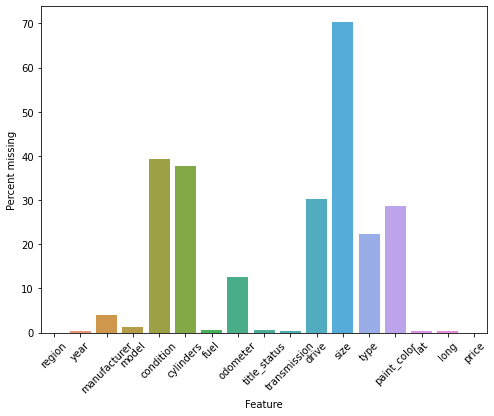

In [11]:
# compute the percentage of missing values for every column, and plot them as a bar chart

null_vals = df2.isnull().sum()/len(df2)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

<AxesSubplot:>

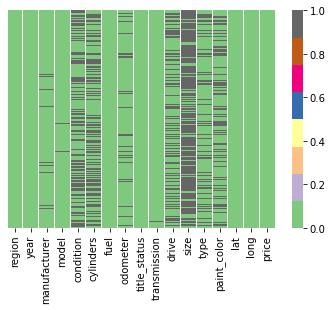

In [12]:
#heatmap to identify nulll values using graph

sns.heatmap(df2.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [13]:
# define numeric variable and categorical variable to work separatly on them

num_col=['year','odometer','lat','long']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']



### 3.1. Estimating better iterative imputer method

In [14]:
check_imputer=df2.copy()

#object of LabelEncoder
encoder=preprocessing.LabelEncoder()

#function to label the categorical columns ignoring null values 
def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#loop to label each column or categorical values into numberic
for i in tqdm(range(len(cat_cols))):
    encode(check_imputer[cat_cols[i]])

100%|██████████| 12/12 [00:00<00:00, 37.91it/s]


In [15]:
check_imputer.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,2,2010.0,7,4518,2,6,2,32742.0,0,2,2,NaN,7,NaN,32.590000,-85.480000,35990
1,2,2014.0,17,10741,0,3,2,93600.0,0,0,1,NaN,9,NaN,32.547500,-85.468200,7500
2,2,2006.0,4,12228,2,5,2,87046.0,0,0,NaN,NaN,0,1,32.616807,-85.464149,4900
3,2,1974.0,7,3558,2,3,2,190000.0,0,0,2,1,8,1,32.861600,-85.216100,2000
4,2,2005.0,13,6287,0,6,0,116000.0,1,0,0,1,8,1,32.547500,-85.468200,19500


In [16]:
# Estimate the score on the entire dataset by filling missing values by mean and median

br_estimator = BayesianRidge() #base estimator
N_SPLITS = 6  #defining the cross-validation splitting strategy

score_simple_imputer = pd.DataFrame() #dataframe to store error of imputer
#computing MSE for mean and median
for strategy in ('mean', 'median'):
    X=check_imputer.iloc[:,:-1]
        #y=check_imputer.iloc[:,-1:].values.ravel()
    y = np.ravel(check_imputer.iloc[:,-1:])
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X, y, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

In [17]:
# Estimate the score on the entire dataset by filling missing values by 4 different iterative imputer


#estimators for IterativeImputer
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for esti in estimators:
        print("Estimating",esti.__class__.__name__)
        imputer = IterativeImputer(esti)
        df_new=check_imputer.copy()
        for col in check_imputer.columns:
            #col=check_imputer.columns[i]
            impute_data=imputer.fit_transform(df_new[col].values.reshape(-1,1))
            impute_data=impute_data.astype('int64')
            impute_data = pd.DataFrame(np.ravel(impute_data))
            df_new[col]=impute_data
        X=df_new.iloc[:,:-1]
        #y=check_imputer.iloc[:,-1:].values.ravel()
        y = np.ravel(df_new.iloc[:,-1:])
        score_iterative_imputer[esti.__class__.__name__] = cross_val_score(esti,X,y,scoring='neg_mean_squared_error',cv=6)

Estimating BayesianRidge
Estimating DecisionTreeRegressor
Estimating ExtraTreesRegressor
Estimating KNeighborsRegressor


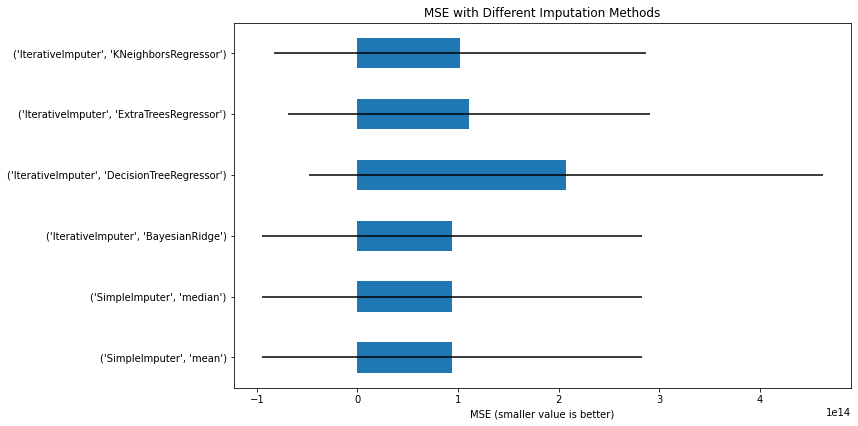

In [18]:
#ploting the graphs of scores each method
scores = pd.concat(
    [score_simple_imputer, score_iterative_imputer],
    keys=['SimpleImputer', 'IterativeImputer'], axis=1
)
fig, ax = plt.subplots(figsize=(12, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('MSE with Different Imputation Methods')
ax.set_xlabel('MSE (smaller value is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels(means.index.tolist())
plt.tight_layout(pad=1)
plt.savefig('different-imputations-method',dpi=None)
plt.show()

### 3.2. Filling Numerical Missing Values

In [19]:
df2.isnull().sum()[num_col]

year          277
odometer    12674
lat           449
long          449
dtype: int64

In [20]:
data_num=df2[num_col]
imputer_num=IterativeImputer(estimators[2]) #estimators[2] = ExtraTreesRegressor
impute_data=imputer_num.fit_transform(data_num)
df2[num_col]=impute_data

In [21]:
# Missing values after filling

df2.isnull().sum()[num_col]

year        0
odometer    0
lat         0
long        0
dtype: int64

### 3.3. Filling Categorical Missing Values

In [22]:
# Missing values before filling

df2.isnull().sum()[cat_cols]

region              0
manufacturer     3895
model            1196
condition       39334
cylinders       37801
fuel              553
title_status      614
transmission      408
drive           30344
size            70346
type            22362
paint_color     28661
dtype: int64

In [23]:
data_cat=df2[cat_cols]
encoder=preprocessing.LabelEncoder()

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(data_cat[columns])
    imputer = IterativeImputer(BayesianRidge())
    impute_data=imputer.fit_transform(data_cat[columns].values.reshape(-1, 1))
    impute_data=impute_data.astype('int64')
    impute_data = pd.DataFrame(impute_data)
    impute_data =encoder.inverse_transform(impute_data.values.reshape(-1, 1))
    data_cat[columns]=impute_data
df2[cat_cols]=data_cat    

In [24]:
# Missing values after filling

df2.isnull().sum()[cat_cols]

region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

<AxesSubplot:>

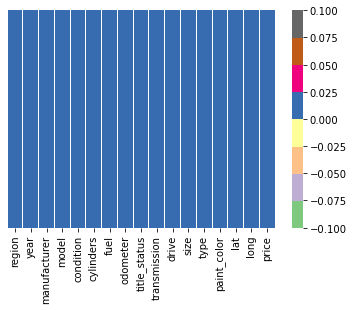

In [25]:
# Heat map tp check numm values visually

sns.heatmap(df2.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [26]:
# print null value in the dataset 

df2.isnull().sum()

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
price           0
dtype: int64

In [27]:
print(df2.head())
df2.shape

   region    year manufacturer                 model  condition    cylinders  \
0  auburn  2010.0    chevrolet  corvette grand sport       good  8 cylinders   
1  auburn  2014.0      hyundai                sonata  excellent  4 cylinders   
2  auburn  2006.0          bmw               x3 3.0i       good  6 cylinders   
3  auburn  1974.0    chevrolet                  c-10       good  4 cylinders   
4  auburn  2005.0         ford           f350 lariat  excellent  8 cylinders   

     fuel  odometer title_status transmission drive       size    type  \
0     gas   32742.0        clean        other   rwd  full-size   other   
1     gas   93600.0        clean    automatic   fwd  full-size   sedan   
2     gas   87046.0        clean    automatic   4wd  full-size     SUV   
3     gas  190000.0        clean    automatic   rwd  full-size  pickup   
4  diesel  116000.0         lien    automatic   4wd  full-size  pickup   

  paint_color        lat       long  price  
0        grey  32.590000 -85.

(100000, 17)

##  4.  Detecting Outliers

In [28]:
# create a new dataframe and copy the the previous dataframe into it

df3=df2.copy()

### Plot the below graphs before Removing Outliers 

### a. Histogram
A histogram is a representation of the distribution of data.

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'odometer'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

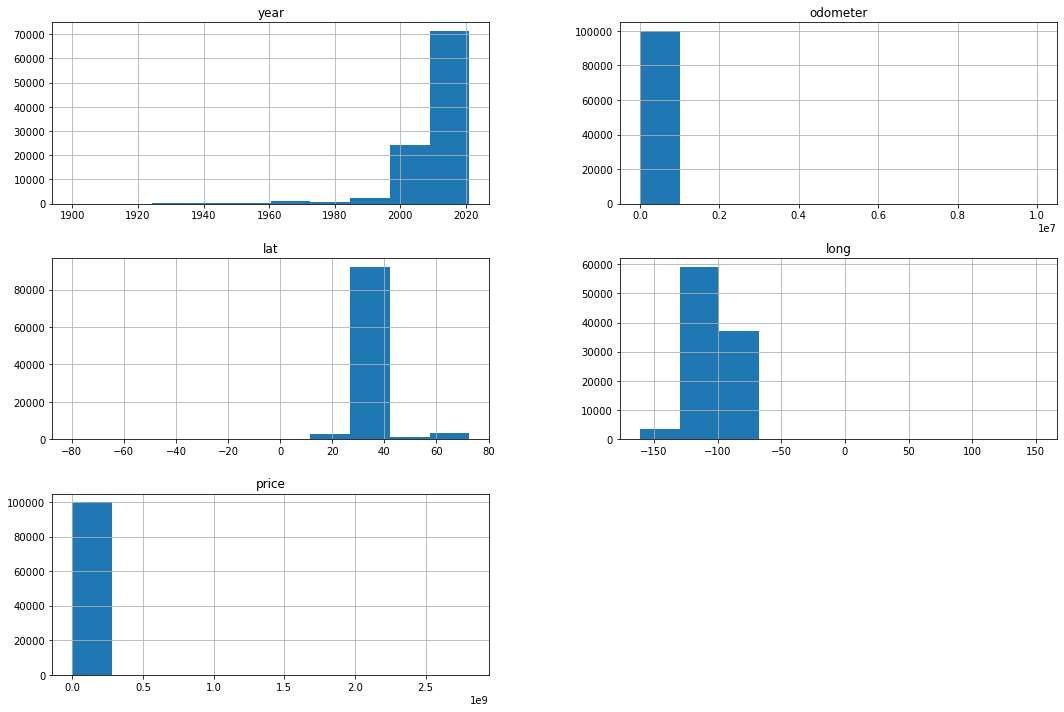

In [29]:
# plot the histogram before removing outliers

df3.hist(figsize=(18,12))

### b. BoxPlot
A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data.

<AxesSubplot:>

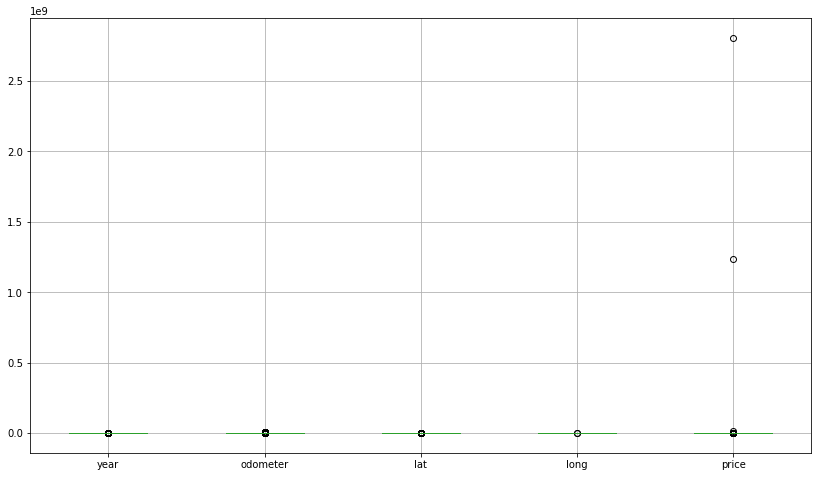

In [30]:
# plot the boxplot before removing outliers

df3.boxplot(figsize=(14,8), return_type='axes')

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

### c. BoxPlot of Outliers

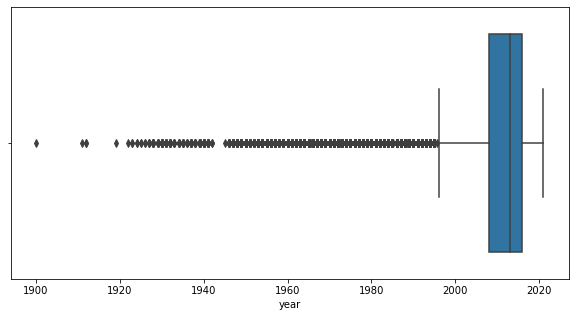

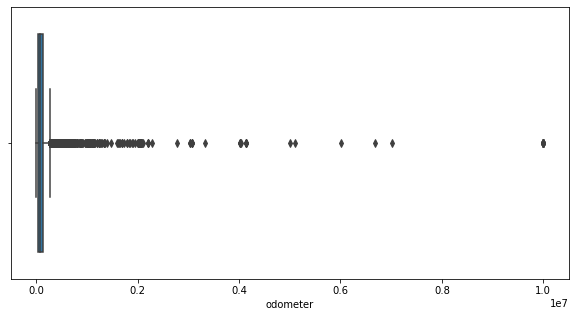

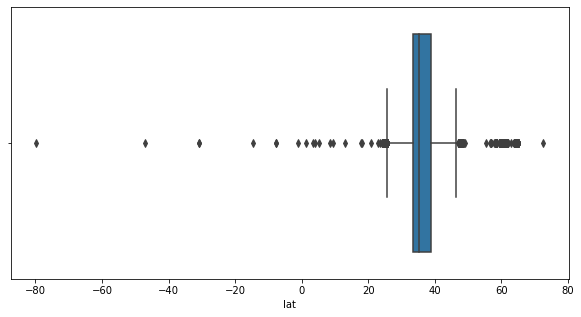

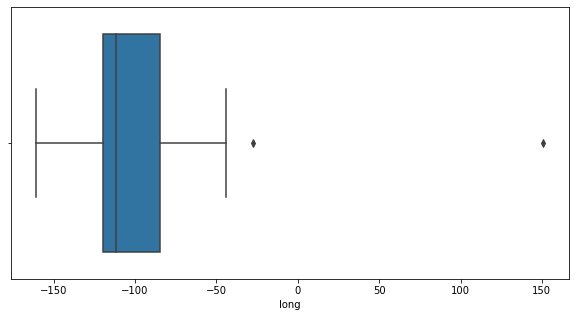

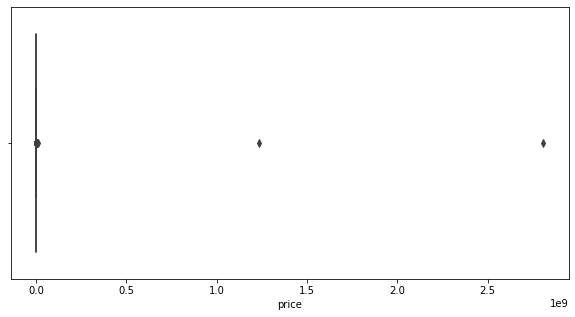

In [31]:
# Draw the boxplot of all the contineous features before removing outliers

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x=df3['year'])

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x=df3['odometer'])

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x=df3['lat'])

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x=df3['long'])

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x=df3['price'])

plt.show()

### d. Co-Relation Matrix

<AxesSubplot:>

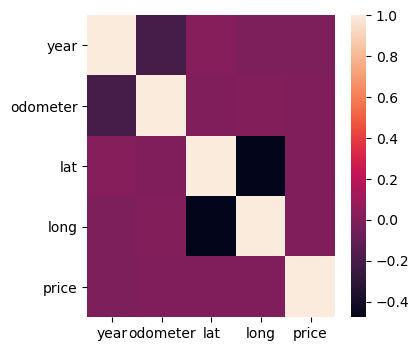

In [32]:
# plot the co-relation matrix of the cointineous features

plt.figure(figsize= (4,4), dpi=100)
sns.heatmap(df3.corr())

In [33]:
print(df3.head())
df3.shape

   region    year manufacturer                 model  condition    cylinders  \
0  auburn  2010.0    chevrolet  corvette grand sport       good  8 cylinders   
1  auburn  2014.0      hyundai                sonata  excellent  4 cylinders   
2  auburn  2006.0          bmw               x3 3.0i       good  6 cylinders   
3  auburn  1974.0    chevrolet                  c-10       good  4 cylinders   
4  auburn  2005.0         ford           f350 lariat  excellent  8 cylinders   

     fuel  odometer title_status transmission drive       size    type  \
0     gas   32742.0        clean        other   rwd  full-size   other   
1     gas   93600.0        clean    automatic   fwd  full-size   sedan   
2     gas   87046.0        clean    automatic   4wd  full-size     SUV   
3     gas  190000.0        clean    automatic   rwd  full-size  pickup   
4  diesel  116000.0         lien    automatic   4wd  full-size  pickup   

  paint_color        lat       long  price  
0        grey  32.590000 -85.

(100000, 17)

##  5.  Removing Outliers

**There are 2 way to remove outliers based on:**

***1. Z-Score:*** 

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

***2. IQR Score:*** 

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper 
and lower quartiles, IQR = Q3 − Q1.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

We will be using both the methods, individually, upon the original dataset (i.e. df3) to compute the score and the reduced dataset size. We will be selecting the one method in which most outliers are getting removed.

### 5.1. Remove outliers using Z-Score

In [34]:
# compute the z-score

from scipy import stats
z = np.abs(stats.zscore(df3[num_col]))
print(z)

[[0.06311097 0.42473872 0.60204844 1.0130122 ]
 [0.36148801 0.01374147 0.60883705 1.01362514]
 [0.48770996 0.05800312 0.59776651 1.01383557]
 ...
 [0.27541046 0.75885205 1.24712554 1.22987584]
 [1.23075817 0.78585882 1.24712554 1.22987584]
 [0.16926072 1.21132182 1.24712554 1.22987584]]


In [35]:
z.shape

(100000, 4)

In [36]:
# remove the outliers

threshold = 3
df3_o = df3[(z < 3).all(axis=1)]

In [37]:
# print both dataframe shape before and after outliers

print('original data', df3.shape)
print('reduced data', df3_o.shape)

original data (100000, 17)
reduced data (94025, 17)


### 5.2. Remove outliers using IQR Score

In [38]:
# copying dataframe into new variable

df3_o1 = df3

In [39]:
# remove the outliers

Q1 = df3_o1.quantile(0.25)
Q3 = df3_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df3_out = df3_o1[~((df3_o1 < (Q1 - 1.5 * IQR)) |(df3_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

year            8.000000
odometer    90942.000000
lat             5.260555
long           35.377212
price       17095.000000
dtype: float64


In [40]:
# print both dataframe shape before and after outliers

print('original data', df3.shape)
print('reduced data', df3_out.shape)

original data (100000, 17)
reduced data (88653, 17)


**Comparision of both outliers removing methods** 

| Methods | Model Performane |
| --- | --- |
| Original DataFrame (Before removing outliers) | (100000, 18) |
| Reduced DataFrame using **Z-Score** (After removing outlier) | (94025, 18) |
| Reduced DataFrame using **IQR-Score** (After removing outlier) | (88653, 18) |

Looking at the above result, we will be using reduced DataFrame with IQR-Score i.e. (df3_out)

In [42]:
df3_out.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,auburn,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,full-size,other,grey,32.590000,-85.480000,35990
1,auburn,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,full-size,sedan,grey,32.547500,-85.468200,7500
2,auburn,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,4wd,full-size,SUV,blue,32.616807,-85.464149,4900
4,auburn,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,32.547500,-85.468200,19500
5,auburn,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,4wd,full-size,pickup,red,32.590000,-85.480000,29590


### Plot the below graphs after Removing Outliers 

### a. Histogram

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'odometer'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

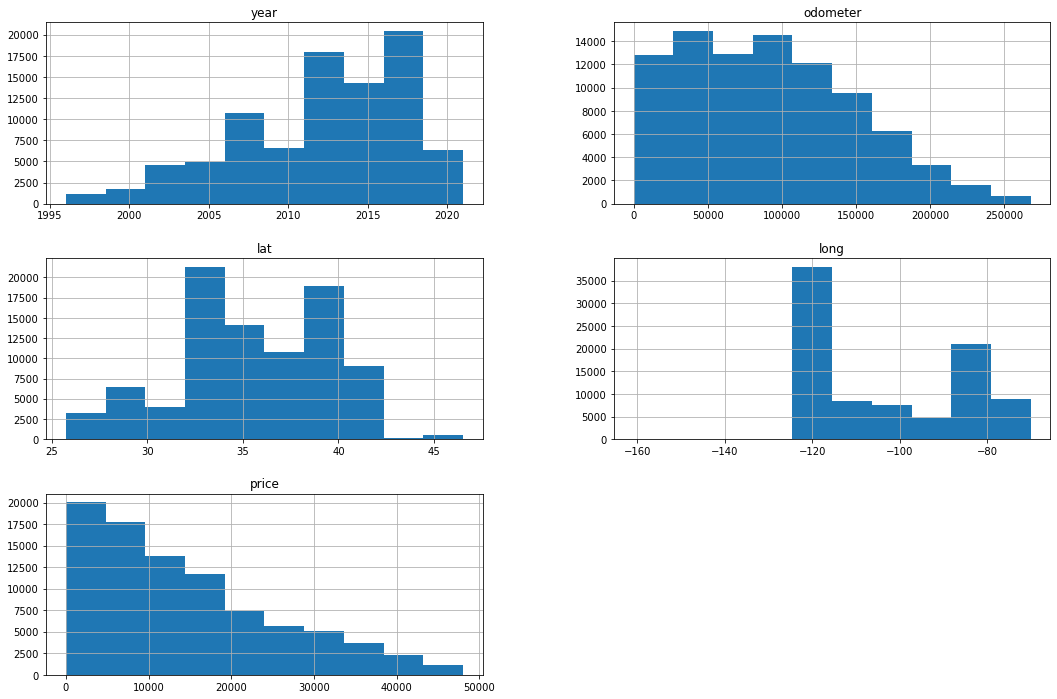

In [43]:
# plot the histogram after removing outliers

df3_out.hist(figsize=(18,12))

### b. BoxPlot

<AxesSubplot:>

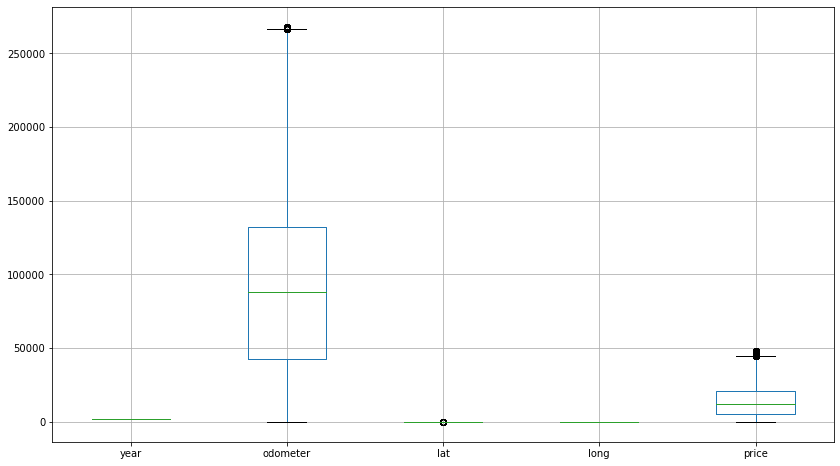

In [44]:
# plot the boxplot after removing outliers

df3_out.boxplot(figsize=(14,8), return_type='axes')

### c. BoxPlot of Outliers

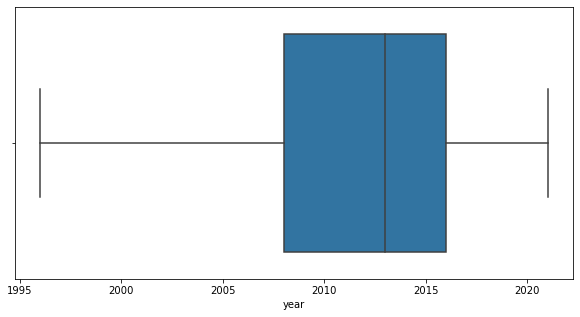

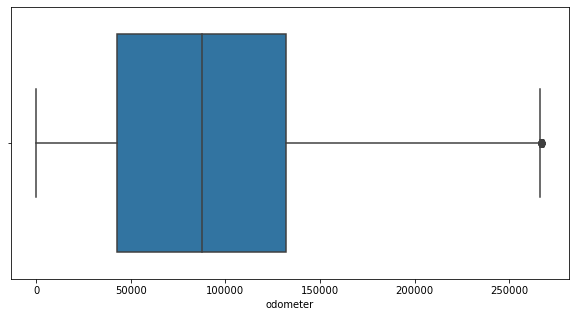

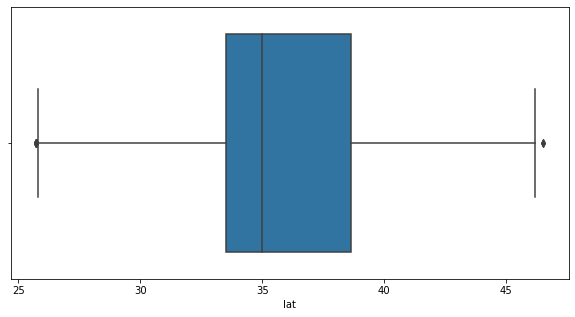

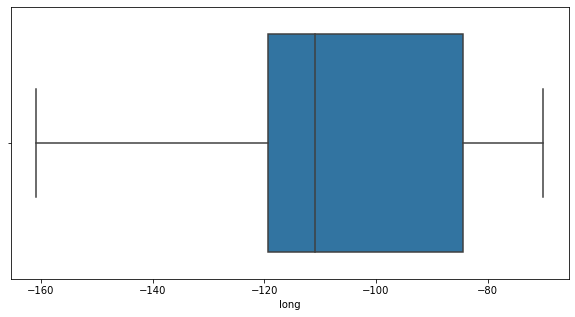

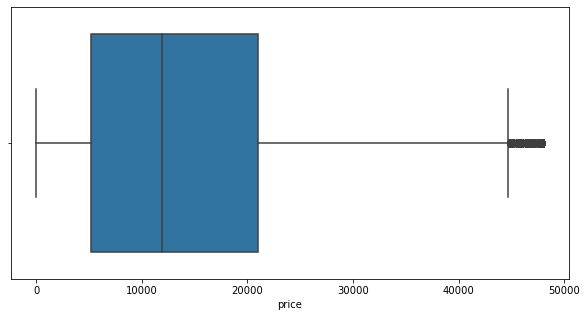

In [45]:
# Draw the boxplot of all the contineous features after removing outliers

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x=df3_out['year'])

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x=df3_out['odometer'])

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x=df3_out['lat'])

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x=df3_out['long'])

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x=df3_out['price'])

plt.show()

In [46]:
# Storing this data into new file for data visualization
df_plot = df3_out.copy()
df_plot.head()
df_plot.to_csv("vehiclesData.csv",index=False)

## 6. Data Normalization

### 6.1. Transforming categorical columns into integer values

In [47]:
df3_out.isna().sum() # debug

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
price           0
dtype: int64

In [48]:
# using SkLearn label encoder function we will convert all the categorical column into integer values

le=preprocessing.LabelEncoder()
df3_out[cat_cols]=df3_out[cat_cols].apply(le.fit_transform)
df3_out.head(2)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,2,2010.0,7,3510,2,6,2,32742.0,0,2,2,1,7,5,32.5900,-85.4800,35990
1,2,2014.0,17,8928,0,3,2,93600.0,0,0,1,1,9,5,32.5475,-85.4682,7500


**Saving data to new file**

We are saving a copy of this data into another file because we are normalizing this data using another method i.e. MinMaxScaler specifically for DNN to get better performace results

In [49]:
df_DNN = df3_out.copy()
df_DNN.head()
df_DNN.to_csv("vehiclesForDNN.csv",index=False)

### 6.2. Scaling/Standardizing

In [50]:
# copy the 'df3_out' dataframe into df4

df4 = df3_out.copy()
df4.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,2,2010.0,7,3510,2,6,2,32742.0,0,2,2,1,7,5,32.590000,-85.480000,35990
1,2,2014.0,17,8928,0,3,2,93600.0,0,0,1,1,9,5,32.547500,-85.468200,7500
2,2,2006.0,4,10219,2,5,2,87046.0,0,0,0,1,0,1,32.616807,-85.464149,4900
4,2,2005.0,13,5061,0,6,0,116000.0,1,0,0,1,8,1,32.547500,-85.468200,19500
5,2,2016.0,38,9325,2,5,2,33290.0,0,2,0,1,8,8,32.590000,-85.480000,29590


In [51]:
col_names = ['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 
                 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'lat', 'long', 'price']

scaler = preprocessing.StandardScaler().fit(df4)
df4 = pd.DataFrame(scaler.transform(df4))
df4.columns = ['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 
                 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'lat', 'long', 'price']
df4.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,-1.668885,-0.367594,-1.099453,-0.723894,1.011725,1.612172,0.032803,-1.015912,-0.150518,3.033145,1.887925,-0.116014,0.255047,-0.177180,-0.721514,1.001547,1.899870
1,-1.668885,0.383832,-0.213986,1.177158,-1.224995,-1.268003,0.032803,0.031792,-0.150518,-0.378328,0.533940,-0.116014,0.838308,-0.177180,-0.732299,1.002217,-0.594895
2,-1.668885,-1.119020,-1.365093,1.630140,1.011725,0.652114,0.032803,-0.081039,-0.150518,-0.378328,-0.820046,-0.116014,-1.786366,-1.336024,-0.714711,1.002447,-0.822568
3,-1.668885,-1.306877,-0.568173,-0.179684,-1.224995,1.612172,-3.047827,0.417421,1.372057,-0.378328,-0.820046,-0.116014,0.546678,-1.336024,-0.732299,1.002217,0.455901
4,-1.668885,0.759545,1.645494,1.316456,1.011725,0.652114,0.032803,-1.006478,-0.150518,3.033145,-0.820046,-0.116014,0.546678,0.691953,-0.721514,1.001547,1.339446


In [53]:
# copy the dataframe to a new file

df4.to_csv("vehiclesFinal.csv",index=False)

# Data Visialization

In [54]:
df_plot = pd.read_csv("vehiclesData.csv")
df_plot.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,auburn,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,full-size,other,grey,32.590000,-85.480000,35990
1,auburn,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,full-size,sedan,grey,32.547500,-85.468200,7500
2,auburn,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,4wd,full-size,SUV,blue,32.616807,-85.464149,4900
3,auburn,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,32.547500,-85.468200,19500
4,auburn,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,4wd,full-size,pickup,red,32.590000,-85.480000,29590


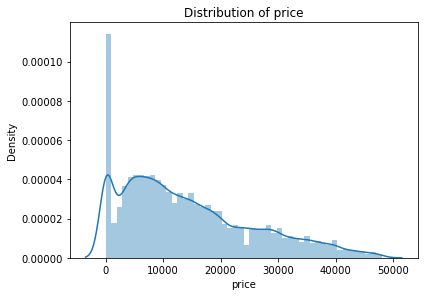

In [55]:
sns.distplot(df_plot.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

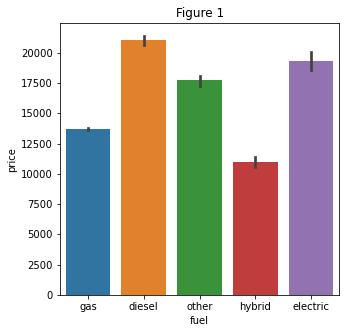

In [56]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuel',y='price',data=df_plot,ax=axs)
axs.set_title('Figure 1')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

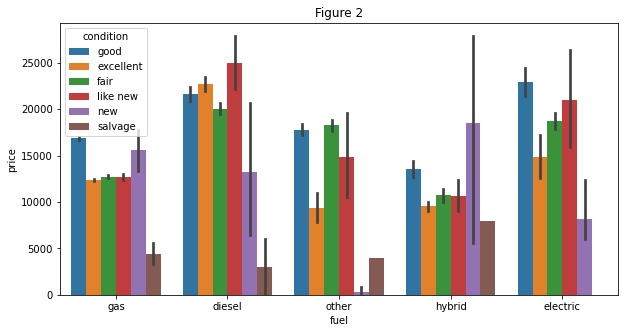

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=df_plot)
plt.title('Figure 2')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

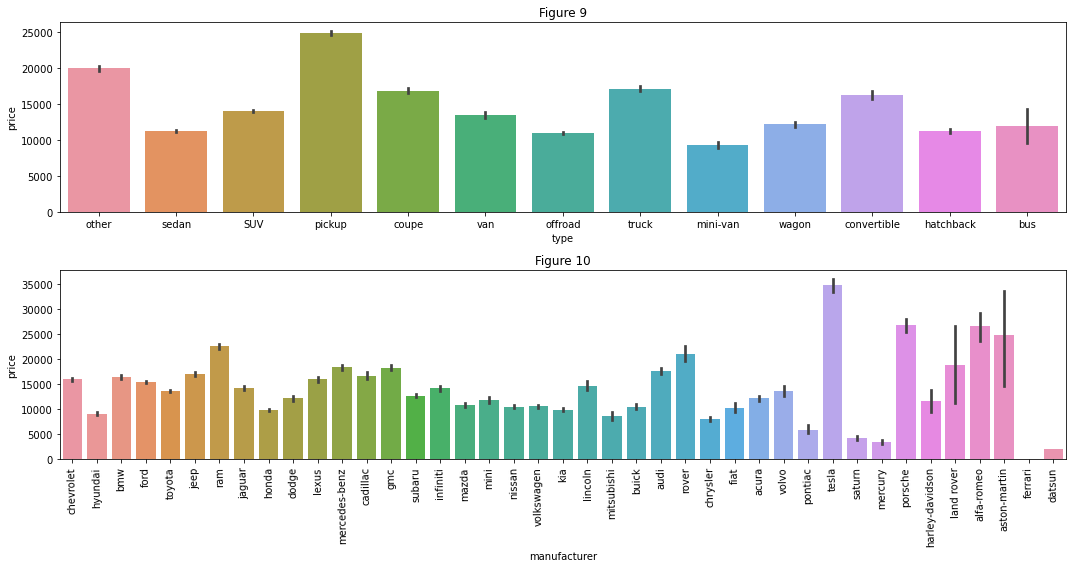

In [58]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=df_plot,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=df_plot,ax=axs[1])
axs[1].set_xticklabels(df_plot.manufacturer.unique(),rotation=91)
axs[0].set_title('Figure 9')
axs[1].set_title('Figure 10')
plt.tight_layout()
plt.savefig('Insight-Figure-9-10.jpg',dpi=600)
plt.show()

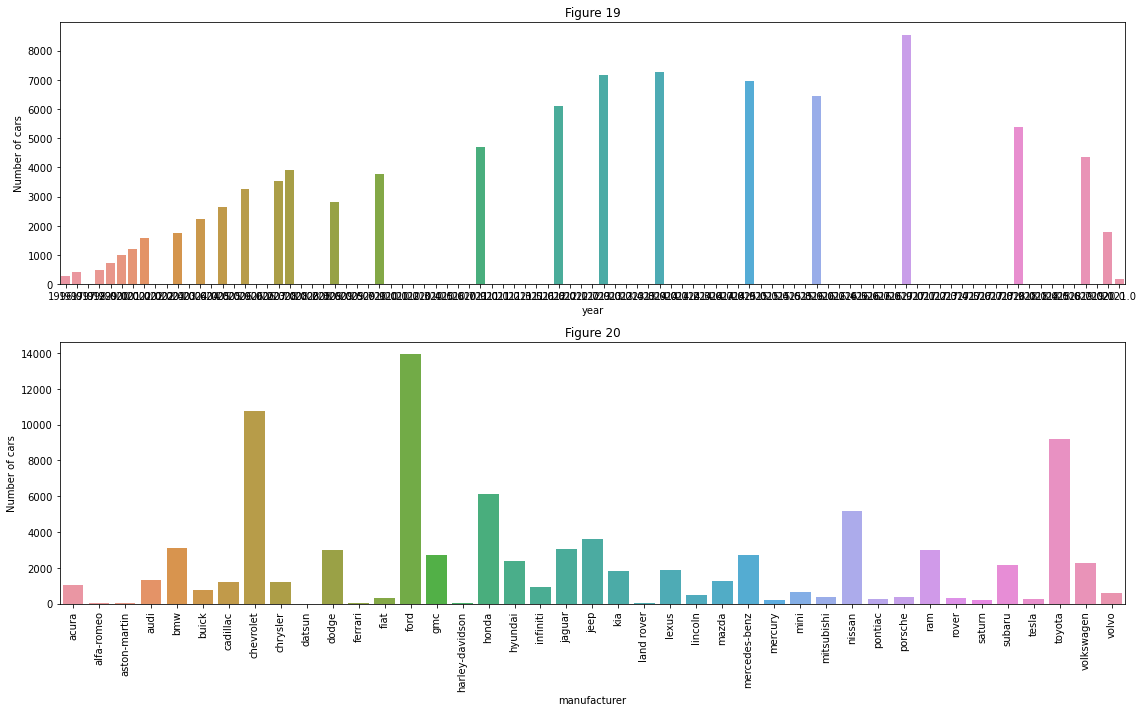

In [59]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(16,10)
sns.barplot(df_plot.groupby('year').count()['price'].index,df_plot.groupby('year').count()['price'].values,ax=axs[0])
sns.barplot(df_plot.groupby('manufacturer').count()['price'].index,df_plot.groupby('manufacturer').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Figure 19')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Figure 20')
axs[1].set_xticklabels(df_plot.groupby('manufacturer').count()['price'].index,rotation=90)
plt.tight_layout()
plt.show()

# Model Implementation

**1. Linear Regression**

**2. K-Neighbors Regressor**

**3. Random Forest Regressor**

**4. Bagging Regressor**

**5. Adaboost Regressor**

**6. XGBoost**

**7. DNN**

## Importing Necessary Libraries

In [60]:
#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

#libraries for models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
from keras import regularizers

from numpy import array
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [61]:
# loading the clean up dataframe

df=pd.read_csv("vehiclesFinal.csv")

In [62]:
print(df.shape)
df.head(10)

(88653, 17)


,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,-1.668885,-0.367594,-1.099453,-0.723894,1.011725,1.612172,0.032803,-1.015912,-0.150518,3.033145,1.887925,-0.116014,0.255047,-0.177180,-0.721514,1.001547,1.899870
1,-1.668885,0.383832,-0.213986,1.177158,-1.224995,-1.268003,0.032803,0.031792,-0.150518,-0.378328,0.533940,-0.116014,0.838308,-0.177180,-0.732299,1.002217,-0.594895
2,-1.668885,-1.119020,-1.365093,1.630140,1.011725,0.652114,0.032803,-0.081039,-0.150518,-0.378328,-0.820046,-0.116014,-1.786366,-1.336024,-0.714711,1.002447,-0.822568
3,-1.668885,-1.306877,-0.568173,-0.179684,-1.224995,1.612172,-3.047827,0.417421,1.372057,-0.378328,-0.820046,-0.116014,0.546678,-1.336024,-0.732299,1.002217,0.455901
4,-1.668885,0.759545,1.645494,1.316456,1.011725,0.652114,0.032803,-1.006478,-0.150518,3.033145,-0.820046,-0.116014,0.546678,0.691953,-0.721514,1.001547,1.339446
5,-1.668885,0.008119,-0.568173,0.493649,1.011725,1.612172,0.032803,-1.412731,-0.150518,3.033145,1.887925,-0.116014,-0.911475,-1.336024,-0.721514,1.001547,2.250136
6,-1.668885,0.008119,-1.099453,-0.958981,1.011725,1.612172,0.032803,-1.531759,-0.150518,3.033145,1.887925,-0.116014,-0.911475,0.691953,-0.721514,1.001547,2.425268
7,-1.668885,0.947402,0.051654,1.611192,1.011725,0.652114,0.032803,-1.069763,-0.150518,3.033145,-0.820046,-0.116014,0.255047,-0.177180,-0.721514,1.001547,1.549605
8,-1.668885,1.323115,-0.568173,1.450140,-1.224995,-1.268003,0.032803,-1.497380,-0.150518,-0.378328,-0.820046,-0.116014,1.421569,-0.177180,0.389331,-1.073799,-1.208736
9,-1.668885,0.008119,-0.568173,-0.287403,-1.224995,-0.307945,-3.047827,1.674157,-0.150518,-0.378328,-0.820046,-0.116014,0.546678,0.981664,-0.709079,1.007209,1.156432


In [63]:
# checking whether any feature is have null/nan values

df.isnull().sum()

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
price           0
dtype: int64

## Split DataSet

Split the entire dataset into three parts. One is train, two is validation, and then a test set.

In [64]:
# Separate out X and Y

X = df.iloc[:, :16]
Y = df.iloc[:, 16:17]

In [65]:
# Train, Test and Validation data split

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.15, random_state=1)
(X_train, X_val, Y_train, Y_val) = train_test_split(X_train, Y_train, test_size=0.1764, random_state=1)

print(X_train.shape,X_test.shape, X_val.shape,Y_train.shape,Y_test.shape,Y_val.shape)

(62062, 16) (13298, 16) (13293, 16) (62062, 1) (13298, 1) (13293, 1)


**Function to compute MSE, RMSE & R-Square**

In [66]:
#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(round(mean_squared_error(y_test, y_pred),4))
    r.append(round(mean_squared_error(y_test, y_pred, squared=False),4))
    r.append(round(r2_score(y_test,y_pred),4))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSE', 'RMSE', 'R2 Score','Accuracy(%)'])

## Feature Engineering

For this, we are using the built-in function of random forest

In [67]:
# Creating and training the model

RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,Y_train)
y_pred = RFR.predict(X_test)

**Performance of the model before feature engineering**

In [68]:
# printing out the performance

r0_rf = result(Y_test,y_pred)
print("MSE : {}".format(r0_rf[0]))
print("RMSE : {}".format(r0_rf[1]))
print("R2 Score : {} or {}%".format(r0_rf[2],r0_rf[3]))

MSE : 0.1739
RMSE : 0.417
R2 Score : 0.8258 or 82.5828%


<AxesSubplot:xlabel='Importance Score', ylabel='Feature'>

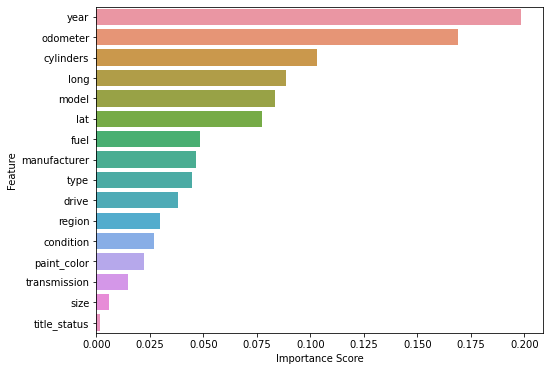

In [69]:
# plot the graph to display the feature importance

feat_imps = pd.DataFrame(RFR.feature_importances_, index = X_train.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (8,6))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")

The above plot depicts that the *size* and *title_status* are not important features to be considered

In [70]:
# dropping the column based on above feature engineering

df2 = df.copy()
df2 = df2.drop(columns=['size', 'title_status'])
print(df2.shape)
df2.head()

(88653, 15)


,region,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,lat,long,price
0,-1.668885,-0.367594,-1.099453,-0.723894,1.011725,1.612172,0.032803,-1.015912,3.033145,1.887925,0.255047,-0.177180,-0.721514,1.001547,1.899870
1,-1.668885,0.383832,-0.213986,1.177158,-1.224995,-1.268003,0.032803,0.031792,-0.378328,0.533940,0.838308,-0.177180,-0.732299,1.002217,-0.594895
2,-1.668885,-1.119020,-1.365093,1.630140,1.011725,0.652114,0.032803,-0.081039,-0.378328,-0.820046,-1.786366,-1.336024,-0.714711,1.002447,-0.822568
3,-1.668885,-1.306877,-0.568173,-0.179684,-1.224995,1.612172,-3.047827,0.417421,-0.378328,-0.820046,0.546678,-1.336024,-0.732299,1.002217,0.455901
4,-1.668885,0.759545,1.645494,1.316456,1.011725,0.652114,0.032803,-1.006478,3.033145,-0.820046,0.546678,0.691953,-0.721514,1.001547,1.339446


### Re-train the model after Feature Engineering and Check the performance

In [71]:
# Separate out X_1 and Y_1 based on new dataframe

X_1 = df2.iloc[:, :14]
Y_1 = df2.iloc[:, 14:15]

In [72]:
# Train, Test and Validation data split

(X_train_1, X_test_1, Y_train_1, Y_test_1) = train_test_split(X_1, Y_1, test_size=0.15, random_state=1)
(X_train_1, X_val_1, Y_train_1, Y_val_1) = train_test_split(X_train_1, Y_train_1, test_size=0.1764, random_state=1)

print(X_train_1.shape,X_test_1.shape, X_val_1.shape,Y_train_1.shape,Y_test_1.shape,Y_val_1.shape)

(62062, 14) (13298, 14) (13293, 14) (62062, 1) (13298, 1) (13293, 1)


In [73]:
# create and train the model

RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train_1,Y_train_1)
y_pred_1 = RFR.predict(X_test_1)

**Performance of the model after feature engineering**

In [74]:
# print the performance results

r0_rf = result(Y_test_1,y_pred_1)
print("MSE : {}".format(r0_rf[0]))
print("RMSE : {}".format(r0_rf[1]))
print("R2 Score : {} or {}%".format(r0_rf[2],r0_rf[3]))

MSE : 0.1747
RMSE : 0.4179
R2 Score : 0.825 or 82.5045%


# 1. Linear Regression

In [76]:
# Create and Train the model
LR = LinearRegression()
LR.fit(X_train_1,Y_train_1)

y_pred_linear = LR.predict(X_test_1)
y_pred_linear = y_pred_linear.reshape(Y_test_1.shape[0],1)

r1_lr = result(Y_test_1,y_pred_linear)

# print('Coefficients: \n', LR.coef_)
print("MSE : {}".format(r1_lr[0]))
print("RMSE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))

# saving the result to file
accu['Linear Regression'] = r1_lr
accu.to_csv('results.csv')

MSE : 0.6465
RMSE : 0.8041
R2 Score : 0.3524 or 35.2399%


# 2. KNN Regressor

## Hyperparameter Tuning

We are using GridSearchCV for Hyperoarameter Tuning

In [430]:
# Initialising the KNN Regressor
KNN = KNeighborsRegressor()

# Initializing the parameter list
param_grid = {'n_jobs': [-1], 'n_neighbors': [3,5,9,15,20], 'algorithm' : ['ball_tree', 'kd_tree', 'brute'], 
             'leaf_size': [5,10,20,30,50,90], 'weights': ['uniform', 'distance']}

# Setting up GridSearchCV for Hyperoarameter Tuning
g_search = GridSearchCV(estimator = KNN, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, 
                        return_train_score=True)

# training the model using validation data
g_search.fit(X_val_1, Y_val_1);

# printing out the best parameters that we received using GridSearchCV
print(g_search.best_params_)

### Train the model using best parameters 

In [77]:
# Initialising the KNN Regressor using the best parameters that we received from above
KNN = KNeighborsRegressor(algorithm='kd_tree', leaf_size=20, n_jobs=-1, n_neighbors=9, weights='distance')

# Training the model
KNN.fit(X_train_1,Y_train_1)

y_pred_knn = KNN.predict(X_test_1)
y_pred_knn = y_pred_knn.reshape(Y_test_1.shape[0],1)

# print the performance results
r2_knn = result(Y_test_1,y_pred_knn)

print("MSE : {}".format(r2_knn[0]))
print("RMSE : {}".format(r2_knn[1]))
print("R2 Score : {} or {}%".format(r2_knn[2],r2_knn[3]))

# saving the result to file
accu['KNN Regressor'] = r2_knn
accu.to_csv('results.csv')

MSE : 0.2907
RMSE : 0.5392
R2 Score : 0.7088 or 70.881%


# 3. Random Forest Regressor

### Hyperparameter Tuning

We are using GridSearchCV for Hyperoarameter Tuning

In [ ]:
# Initialising the Random Forest Regressor
RFR = RandomForestRegressor(random_state = 1)

# Initializing the parameter list
param_grid = {n_jobs': [-1], 'oob_score': [False], 'bootstrap': [True], 'max_depth': [5000, 10000, 20000, None], 
              'max_features': ['auto', 'sqrt'], 'n_estimators': [40, 50, 60, 70, 80, 90], 
              'min_samples_leaf': [1, 3, 5, 7, 9], 'min_samples_split': [5, 10, 15]}

# Setting up GridSearchCV for Hyperoarameter Tuning
g_search = GridSearchCV(estimator = RFR, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, 
                        return_train_score=True)

# training the model using validation data
g_search.fit(X_val_1, Y_val_1);

# printing out the best parameters that we received using GridSearchCV
print(g_search.best_params_)

### Train the model using best parameters 

In [78]:
# Initialising the Random Forest Regressor using the best parameters that we received from above
RFR = RandomForestRegressor(random_state=1, n_jobs=-1, oob_score=False, bootstrap=True, max_depth=5000, max_features='sqrt', 
                            min_samples_leaf=1, min_samples_split=5, n_estimators=90)

# Training the model
RFR.fit(X_train_1,Y_train_1)

y_pred_rfr = RFR.predict(X_test_1)
y_pred_rfr = y_pred_rfr.reshape(Y_test_1.shape[0],1)

# print the performance results
r3_rf = result(Y_test_1,y_pred_rfr)

print("MSE : {}".format(r3_rf[0]))
print("RMSE : {}".format(r3_rf[1]))
print("R2 Score : {} or {}%".format(r3_rf[2],r3_rf[3]))

# saving the result to file
accu['Random Forest Regressor'] = r3_rf
accu.to_csv('results.csv')

MSE : 0.1922
RMSE : 0.4384
R2 Score : 0.8075 or 80.7474%


# 4. Bagging Regressor

### Hyperparameter Tuning

We are using GridSearchCV for Hyperoarameter Tuning

In [438]:
# Initialising the Bagging Regressor
BR = BaggingRegressor(random_state = 1)

# Initializing the parameter list
param_grid = {'n_jobs': [-1], 'base_estimator': [DecisionTreeRegressor(max_depth=20)], 
              'n_estimators': [10, 20, 35, 50, 70], 'random_state': [1], 'max_samples': [1], 'max_features':[1],
             'bootstrap': [False], 'bootstrap_features': [False], 'oob_score': [False], 'warm_start': [False]}

# Setting up GridSearchCV for Hyperoarameter Tuning
g_search = GridSearchCV(estimator = BR, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, 
                        return_train_score=True)

# training the model using validation data
g_search.fit(X_val_1, Y_val_1);


# printing out the best parameters that we received using GridSearchCV
print(g_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    3.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.1s finished


{'base_estimator': DecisionTreeRegressor(max_depth=20), 'bootstrap': False, 'bootstrap_features': False, 'max_features': 1, 'max_samples': 1, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'warm_start': False}


### Train the model using best parameters 

In [79]:
# Initialising the Bagging Regressor using the best parameters that we received from above
BR = BaggingRegressor(random_state=1, base_estimator=DecisionTreeRegressor(max_depth=20), bootstrap=False,
                      bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20, n_jobs=-1, 
                      oob_score=False, warm_start=False)

# Train the model
BR.fit(X_train_1,Y_train_1)

y_pred_br = BR.predict(X_test_1)
y_pred_br = y_pred_br.reshape(Y_test_1.shape[0], 1)

# print the performance results
r4_br = result(Y_test_1,y_pred_br)

print("MSE : {}".format(r4_br[0]))
print("RMSE : {}".format(r4_br[1]))
print("R2 Score : {} or {}%".format(r4_br[2],r4_br[3]))

# saving the result to file
accu['Bagging Regressor'] = r4_br
accu.to_csv('results.csv')

MSE : 0.3443
RMSE : 0.5868
R2 Score : 0.6551 or 65.5083%


# 5. Adaboost Regressor

### Hyperparameter Tuning

We are using GridSearchCV for Hyperoarameter Tuning

In [ ]:
# Initialising the AdaBoost Regressor
ABR = AdaBoostRegressor(random_state = 1)

# Initializing the parameter list
param_grid = {'n_jobs': [-1], 'base_estimator': [DecisionTreeRegressor(max_depth=25)], 
              'n_estimators': [30, 50, 100, 150, 200], 'learning_rate': [0.2, 0.6, 1.0, 1.5], 
              'loss': ['linear', 'square', 'exponential']}

# Setting up GridSearchCV for Hyperoarameter Tuning
g_search = GridSearchCV(estimator = ABR, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, 
                        return_train_score=True)

# training the model using validation data
g_search.fit(X_val_1, Y_val_1);


# printing out the best parameters that we received using GridSearchCV
print(g_search.best_params_)

### Train the model using best parameters

In [80]:
# Initialising the AdaBoost Regressor using the best parameters that we received from above
ABR = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=25), learning_rate=0.6, 
                        loss='square', n_estimators=200)

# Train the model
ABR.fit(X_train_1,Y_train_1)

y_pred_abr = ABR.predict(X_test_1)
y_pred_abr = y_pred_abr.reshape(Y_test_1.shape[0],1)

# print the performance results
r5_ab = result(Y_test_1,y_pred_abr)

print("MSE : {}".format(r5_ab[0]))
print("RMSE : {}".format(r5_ab[1]))
print("R2 Score : {} or {}%".format(r5_ab[2],r5_ab[3]))

# saving the result to file
accu['Adaboost Regressor'] = r5_ab
accu.to_csv('results.csv')

MSE : 0.1772
RMSE : 0.4209
R2 Score : 0.8225 or 82.2524%


# 6. XG Boost Regressor 

### Hyperparameter Tuning

We are using GridSearchCV for Hyperoarameter Tuning

In [18]:
# Initialising the XGBoost Regressor
XGB = XGBRegressor()

# Initializing the parameter list
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 15, 25],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [200]}

# Setting up GridSearchCV for Hyperoarameter Tuning
g_search = GridSearchCV(estimator = XGB, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, 
                        return_train_score=True)

# training the model using validation data
g_search.fit(X_val_1, Y_val_1);


# printing out the best parameters that we received using GridSearchCV
print(g_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   43.6s finished


[21:25:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 15, 'min_child_weight': 4, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


### Train the model using best parameters

In [81]:
# Initialising the XGBoost Regressor using the best parameters that we received from above
XGB = XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=15, min_child_weight=4, 
                   n_estimators=200, nthread=4, objective='reg:squarederror', silent=1, subsample=0.7)

# Train the model
XGB.fit(X_train_1,Y_train_1)

y_pred_xgb = XGB.predict(X_test_1)
y_pred_xgb = y_pred_xgb.reshape(Y_test_1.shape[0],1)

# print the performance results
r6_xg = result(Y_test_1,y_pred_xgb)

print("MSE : {}".format(r6_xg[0]))
print("RMSE : {}".format(r6_xg[1]))
print("R2 Score : {} or {}%".format(r6_xg[2],r6_xg[3]))

# saving the result to file
accu['XG Boost Regressor'] = r6_xg
accu.to_csv('results.csv')

[14:32:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


MSE : 0.1343
RMSE : 0.3664
R2 Score : 0.8655 or 86.5507%


# 7. DNN

In [82]:
# loading the seprate not normalized file for DNN 
df5=pd.read_csv("vehiclesForDNN.csv")
df5.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,2,2010.0,7,3510,2,6,2,32742.0,0,2,2,1,7,5,32.590000,-85.480000,35990
1,2,2014.0,17,8928,0,3,2,93600.0,0,0,1,1,9,5,32.547500,-85.468200,7500
2,2,2006.0,4,10219,2,5,2,87046.0,0,0,0,1,0,1,32.616807,-85.464149,4900
3,2,2005.0,13,5061,0,6,0,116000.0,1,0,0,1,8,1,32.547500,-85.468200,19500
4,2,2016.0,38,9325,2,5,2,33290.0,0,2,0,1,8,8,32.590000,-85.480000,29590


### Normalizing the data using MinMax Scaler

In [83]:
scalerMM = MinMaxScaler().fit(df5)
df5 = pd.DataFrame(scalerMM.transform(df5))
df5.columns = ['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 
                 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'lat', 'long', 'price']
df5.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,0.025974,0.56,0.175,0.332512,0.4,0.857143,0.5,0.122172,0.0,1.0,1.0,0.333333,0.583333,0.454545,0.330040,0.829894,0.749792
1,0.025974,0.72,0.425,0.845775,0.0,0.428571,0.5,0.349254,0.0,0.0,0.5,0.333333,0.750000,0.454545,0.327996,0.830024,0.156250
2,0.025974,0.40,0.100,0.968075,0.4,0.714286,0.5,0.324799,0.0,0.0,0.0,0.333333,0.000000,0.090909,0.331330,0.830069,0.102083
3,0.025974,0.36,0.325,0.479443,0.0,0.857143,0.0,0.432836,0.2,0.0,0.0,0.333333,0.666667,0.090909,0.327996,0.830024,0.406250
4,0.025974,0.80,0.950,0.883384,0.4,0.714286,0.5,0.124216,0.0,1.0,0.0,0.333333,0.666667,0.727273,0.330040,0.829894,0.616458


In [84]:
# drop the below columns based on above feature engineering

df5 = df5.drop(columns=['size', 'title_status'])
df5.shape

(88653, 15)

In [85]:
# Separate out X_1 and Y_1 based on new dataframe

X_2 = df5.iloc[:, :14]
Y_2 = df5.iloc[:, 14:15]

In [86]:
# Train, Test and Validation data split

(X_train_2, X_test_2, Y_train_2, Y_test_2) = train_test_split(X_2, Y_2, test_size=0.15, random_state=1)
(X_train_2, X_val_2, Y_train_2, Y_val_2) = train_test_split(X_train_2, Y_train_2, test_size=0.1764, random_state=1)

print(X_train_2.shape,X_test_2.shape, X_val_2.shape,Y_train_2.shape,Y_test_2.shape,Y_val_2.shape)

(62062, 14) (13298, 14) (13293, 14) (62062, 1) (13298, 1) (13293, 1)


**Defining custom keras function for getting MSE, RMSE and R-Square values**

In [87]:
# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

### Hyperparameter Tuning¶
We are using GridSearchCV for Hyperoarameter Tuning

In [ ]:
# defining a DNN model
def create_model():
    model = Sequential()
    model.add(Dense(14, input_dim=14, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='mse', optimizer='adam', metrics=["mean_squared_error", rmse, r_square])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# creating model using above funtion defenition
model = KerasRegressor(build_fn=create_model, verbose=2)

# define the grid search parameters
# tuning batch size and epochs
batch_size = [5, 10, 20, 30, 40]
epochs = [50, 100, 150]

param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_val_2, Y_val_2)

In [ ]:
# printing the results (batch_size & epochs)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# compute mean, standard deviation and parameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# defining a DNN model
def create_model(optimizer, kernel_initializer):
    model = Sequential()
    model.add(Dense(14, input_dim=14, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dense(6, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dense(1, kernel_initializer=kernel_initializer, activation='sigmoid'))
    model.compile(loss='mse', optimizer=optimizer, metrics=["mean_squared_error", rmse, r_square])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed) 

# creating model using above funtion defenition
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=2)

# define the grid search parameters
# tuning optimizer and kernel_initializer
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
kernel_initializer=['zeros','uniform','ones','random_uniform', 'truncated_normal','orthogonal']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_val_2, Y_val_2)

In [ ]:
# printing the results (optimizer & kernel_initializer)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# compute mean, standard deviation and parameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Train the model using best parameters

In [88]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Defining the DNN model
model = Sequential()
model.add(Dense(14, input_dim=14, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=["mean_squared_error", rmse, r_square])

# Training the model
result_DNN = model.fit(X_train_2, Y_train_2, validation_data=(X_val_2, Y_val_2), epochs=100, batch_size=100, verbose=2)

# Testing the model
y_pred_dnn = model.predict(X_test_2)

# reshaping the prediction to use in below graphs
y_pred_dnn = y_pred_dnn.reshape(Y_test_2.shape[0], 1)

# print the performance results
r7_dnn = result(Y_test_2,y_pred_dnn)

print("MSE : {}".format(r7_dnn[0]))
print("RMSE : {}".format(r7_dnn[1]))
print("R2 Score : {} or {}%".format(r7_dnn[2],r7_dnn[3]))

# saving the result to file
accu['DNN Regressor'] = r7_dnn
accu.to_csv('results.csv')

Epoch 1/100
621/621 - 2s - loss: 0.0380 - mean_squared_error: 0.0380 - rmse: 0.1422 - r_square: 0.3189 - val_loss: 0.0324 - val_mean_squared_error: 0.0324 - val_rmse: 0.1272 - val_r_square: 0.4203
Epoch 2/100
621/621 - 1s - loss: 0.0312 - mean_squared_error: 0.0312 - rmse: 0.1236 - r_square: 0.4394 - val_loss: 0.0305 - val_mean_squared_error: 0.0305 - val_rmse: 0.1225 - val_r_square: 0.4560
Epoch 3/100
621/621 - 1s - loss: 0.0300 - mean_squared_error: 0.0300 - rmse: 0.1204 - r_square: 0.4617 - val_loss: 0.0294 - val_mean_squared_error: 0.0294 - val_rmse: 0.1195 - val_r_square: 0.4764
Epoch 4/100
621/621 - 1s - loss: 0.0295 - mean_squared_error: 0.0295 - rmse: 0.1196 - r_square: 0.4700 - val_loss: 0.0299 - val_mean_squared_error: 0.0299 - val_rmse: 0.1203 - val_r_square: 0.4655
Epoch 5/100
621/621 - 1s - loss: 0.0289 - mean_squared_error: 0.0289 - rmse: 0.1179 - r_square: 0.4814 - val_loss: 0.0282 - val_mean_squared_error: 0.0282 - val_rmse: 0.1163 - val_r_square: 0.4966
Epoch 6/100
621

Epoch 43/100
621/621 - 1s - loss: 0.0199 - mean_squared_error: 0.0199 - rmse: 0.0971 - r_square: 0.6418 - val_loss: 0.0230 - val_mean_squared_error: 0.0230 - val_rmse: 0.1030 - val_r_square: 0.5884
Epoch 44/100
621/621 - 1s - loss: 0.0198 - mean_squared_error: 0.0198 - rmse: 0.0971 - r_square: 0.6444 - val_loss: 0.0227 - val_mean_squared_error: 0.0227 - val_rmse: 0.1028 - val_r_square: 0.5952
Epoch 45/100
621/621 - 1s - loss: 0.0198 - mean_squared_error: 0.0198 - rmse: 0.0972 - r_square: 0.6415 - val_loss: 0.0230 - val_mean_squared_error: 0.0230 - val_rmse: 0.1039 - val_r_square: 0.5892
Epoch 46/100
621/621 - 1s - loss: 0.0196 - mean_squared_error: 0.0196 - rmse: 0.0967 - r_square: 0.6462 - val_loss: 0.0230 - val_mean_squared_error: 0.0230 - val_rmse: 0.1033 - val_r_square: 0.5881
Epoch 47/100
621/621 - 1s - loss: 0.0193 - mean_squared_error: 0.0193 - rmse: 0.0961 - r_square: 0.6523 - val_loss: 0.0227 - val_mean_squared_error: 0.0227 - val_rmse: 0.1024 - val_r_square: 0.5945
Epoch 48/1

Epoch 85/100
621/621 - 1s - loss: 0.0151 - mean_squared_error: 0.0151 - rmse: 0.0849 - r_square: 0.7273 - val_loss: 0.0216 - val_mean_squared_error: 0.0216 - val_rmse: 0.0980 - val_r_square: 0.6142
Epoch 86/100
621/621 - 1s - loss: 0.0149 - mean_squared_error: 0.0149 - rmse: 0.0843 - r_square: 0.7300 - val_loss: 0.0228 - val_mean_squared_error: 0.0228 - val_rmse: 0.1007 - val_r_square: 0.5926
Epoch 87/100
621/621 - 1s - loss: 0.0148 - mean_squared_error: 0.0148 - rmse: 0.0843 - r_square: 0.7333 - val_loss: 0.0217 - val_mean_squared_error: 0.0217 - val_rmse: 0.0974 - val_r_square: 0.6129
Epoch 88/100
621/621 - 1s - loss: 0.0144 - mean_squared_error: 0.0144 - rmse: 0.0829 - r_square: 0.7401 - val_loss: 0.0214 - val_mean_squared_error: 0.0214 - val_rmse: 0.0963 - val_r_square: 0.6183
Epoch 89/100
621/621 - 1s - loss: 0.0145 - mean_squared_error: 0.0145 - rmse: 0.0834 - r_square: 0.7381 - val_loss: 0.0222 - val_mean_squared_error: 0.0222 - val_rmse: 0.0988 - val_r_square: 0.6027
Epoch 90/1

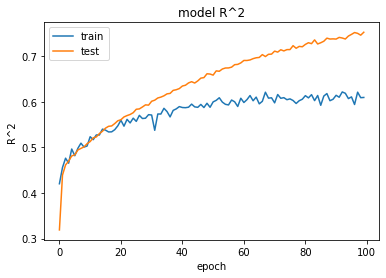

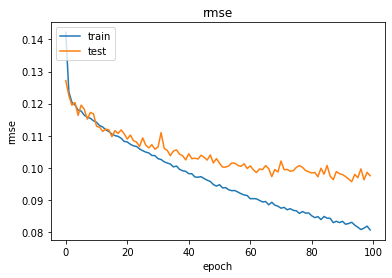

In [89]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(result_DNN.history['val_r_square'])
plt.plot(result_DNN.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
plt.plot(result_DNN.history['rmse'])
plt.plot(result_DNN.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

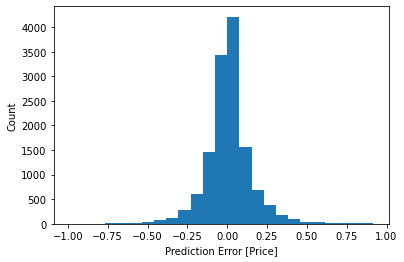

In [92]:
# plot error distribution

error = y_pred_dnn - Y_test_2
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")

# Results

In [93]:
accuracy=pd.read_csv('./results.csv',index_col=0)
accuracy

,Linear Regression,KNN Regressor,Random Forest Regressor,Bagging Regressor,Adaboost Regressor,XG Boost Regressor,DNN Regressor
MSE,0.6465,0.2907,0.1922,0.3443,0.1772,0.1343,0.0212
RMSE,0.8041,0.5392,0.4384,0.5868,0.4209,0.3664,0.1455
R2 Score,0.3524,0.7088,0.8075,0.6551,0.8225,0.8655,0.6251
Accuracy(%),35.2399,70.8810,80.7474,65.5083,82.2524,86.5507,62.5141


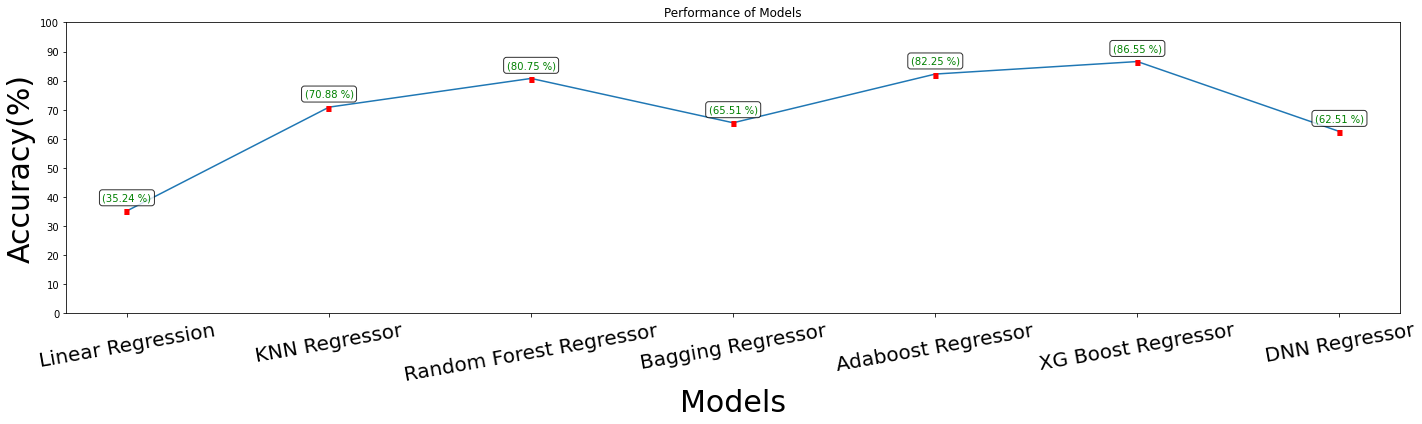

In [94]:
model_accuracy=accuracy.loc['Accuracy(%)']

x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();

## Model Comparisons

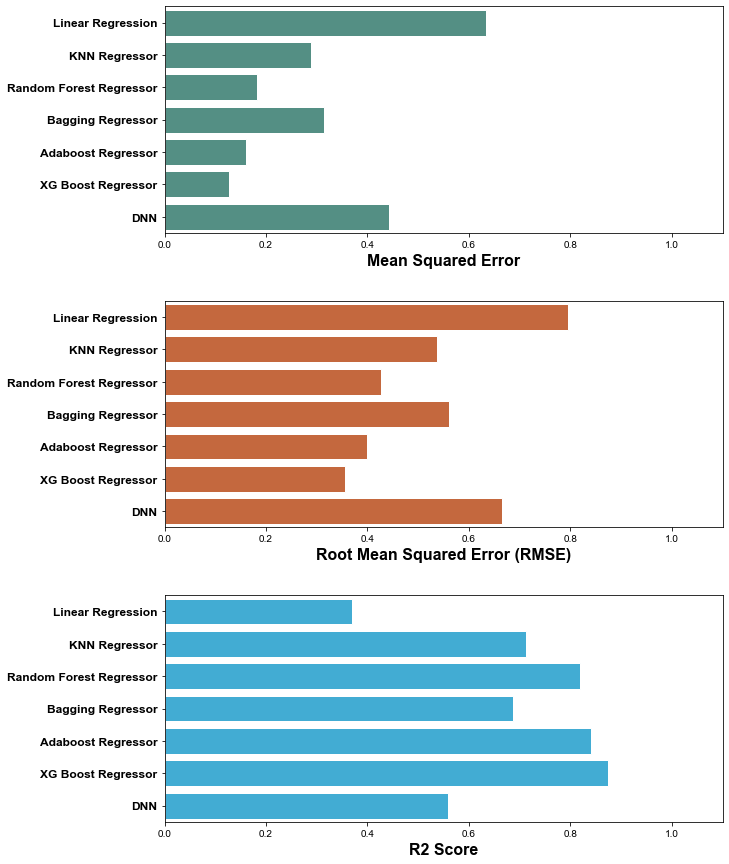

In [95]:
# Plot Model Results 
Model = ['Linear Regression', 'KNN Regressor', 'Random Forest Regressor', 'Bagging Regressor', 'Adaboost Regressor', 
         'XG Boost Regressor', 'DNN']
MSE = [0.6328, 0.2893, 0.1823, 0.3137, 0.1598, 0.127, 0.443]
RMSE = [0.7955, 0.5378, 0.4269, 0.5601, 0.3997, 0.3563, 0.6656]
R2_Score = [0.3692, 0.7116, 0.8183, 0.6873, 0.8407, 0.8734, 0.5583]

f, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(10, 15));
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.48, hspace=0.3)
sns.set(style="white");

sns.barplot(y=Model, x=MSE, orient='h',label="Mean Squared Error",ax=ax1,color='#4a998a');
ax1.set_xlabel("Mean Squared Error",fontweight='bold',fontsize=16);
ax1.set_yticklabels(Model,fontweight='bold',fontsize=12)
ax1.set_xlim(0,1.1)

sns.barplot(y=Model, x=RMSE ,orient='h',label="Root Mean Squared Error",ax=ax2,color='#da5f28');
ax2.set_yticklabels(Model,fontweight='bold',fontsize=12)
ax2.set_xlabel('Root Mean Squared Error (RMSE)',fontweight='bold',fontsize=16);
ax2.set_xlim(0,1.1)

sns.barplot(y=Model, x=R2_Score ,orient='h',label="R2 Score",ax=ax3,color='#2AB7EB');
ax3.set_yticklabels(Model,fontweight='bold',fontsize=12)
ax3.set_xlabel('R2 Score',fontweight='bold',fontsize=16);
ax3.set_xlim(0,1.1)

plt.savefig('modelComparison.png',dpi=400)

## Plotting Residuals vs Predicted Values

In [96]:
# defining common function to plot the below graphs

def residuals(test, prediction,colz,title):
    sns.set_style("white")
    Residual = test - prediction
    plt.scatter(prediction, Residual,color=str(colz))
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xlabel('Predicted Prices',fontsize=15)
    plt.ylabel('Residual (Errors)',fontsize=15)
    plt.axhline(y=0,color=str(colz))
    plt.title(str((title)),fontsize=18)
    x = plt.scatter(prediction,Residual,color=str(colz))
    return x 

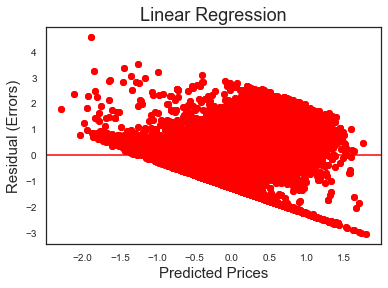

In [97]:
residuals(Y_test_1, y_pred_linear,'red','Linear Regression')

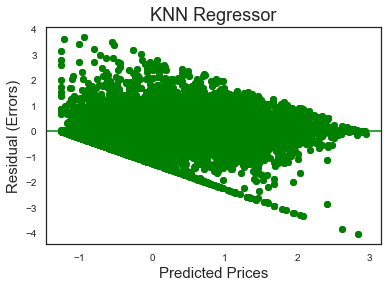

In [98]:
residuals(Y_test_1, y_pred_knn,'green','KNN Regressor')

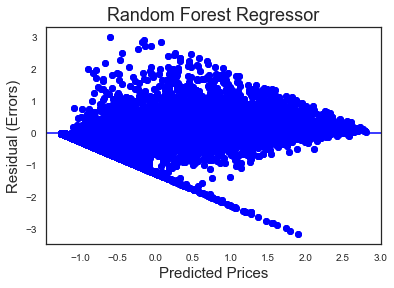

In [99]:
residuals(Y_test_1, y_pred_rfr,'blue','Random Forest Regressor')

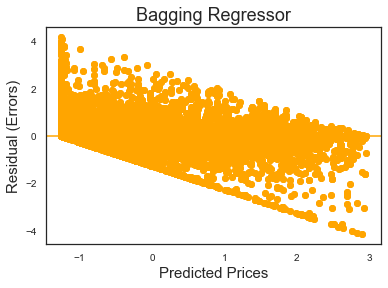

In [100]:
residuals(Y_test_1, y_pred_br,'orange','Bagging Regressor')

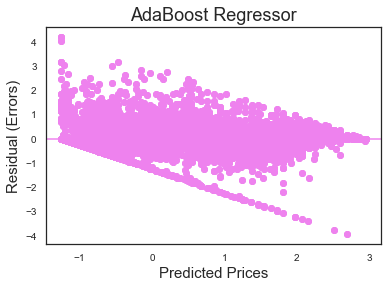

In [101]:
residuals(Y_test_1, y_pred_abr,'violet','AdaBoost Regressor')

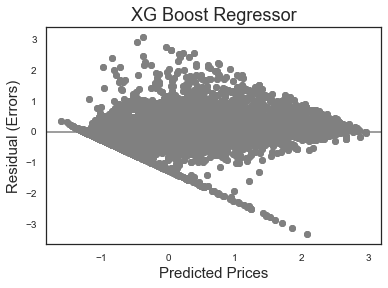

In [102]:
residuals(Y_test_1, y_pred_xgb,'grey','XG Boost Regressor')

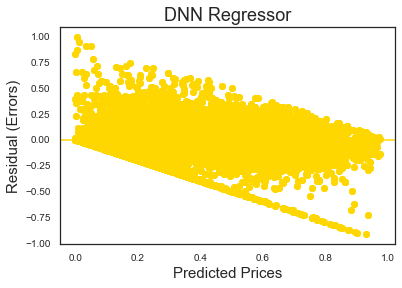

In [103]:
residuals(Y_test_2, y_pred_dnn,'gold','DNN Regressor')

### Conclusion

From the result table, we conclude that XGBoost is the best model for the prediction of the used car prices as XGBoost is a regression model giving the best R2 Score values.